In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/k/NLP/capstone/Cleaned_data.csv',)
df.head()

,Unnamed: 0,Unnamed: 0.1,Short description,Description,Caller,Assignment group,SC + DC + Caller,Assignment RE-group,Cleaned,Length,Language
0,0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issuespxjnwir pjlcoqds-verified user det...,GRP_0,login issue verify user detail employee manage...,36,en
1,1,1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlookhmjdrvpb komuaywn\r\n\r\nreceived from:...,GRP_0,outlook hello team meeting skype meeting appea...,24,en
2,2,2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpneylqgodm ybqkwiam\r\n\r\nrec...,GRP_0,log vpn log vpn good,12,en
3,3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz gcpydtequnable to access hr_tool page,GRP_0,unable access hr tool page,6,en
4,4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme qhcozdfxskype error,GRP_0,skype error,2,en


In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Short description', 'Description',
       'Caller', 'Assignment group', 'SC + DC + Caller', 'Assignment RE-group',
       'Cleaned', 'Length', 'Language'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1','Short description','Description','Caller','SC + DC + Caller'],axis=1)

In [ ]:
df.head(2)

,Assignment group,Assignment RE-group,Cleaned,Length,Language
0,GRP_0,GRP_0,login issue verify user detail employee manage...,36,en
1,GRP_0,GRP_0,outlook hello team meeting skype meeting appea...,24,en


In [ ]:
# Selecting the Groups having more than 100 Indiviual records
Counts = pd.DataFrame(df['Assignment group'].value_counts())
Others = []
for Group in df['Assignment group'].unique():
    if Counts.loc[Group][0] < 200:
        Others.append(Group)
print('{0} Groups in dataset have less than 200 samples'.format(len(Others)))

df['Assignment RE-group'] =df['Assignment group'].apply(lambda x: 'Others' if x in Others else x)

66 Groups in dataset have less than 200 samples


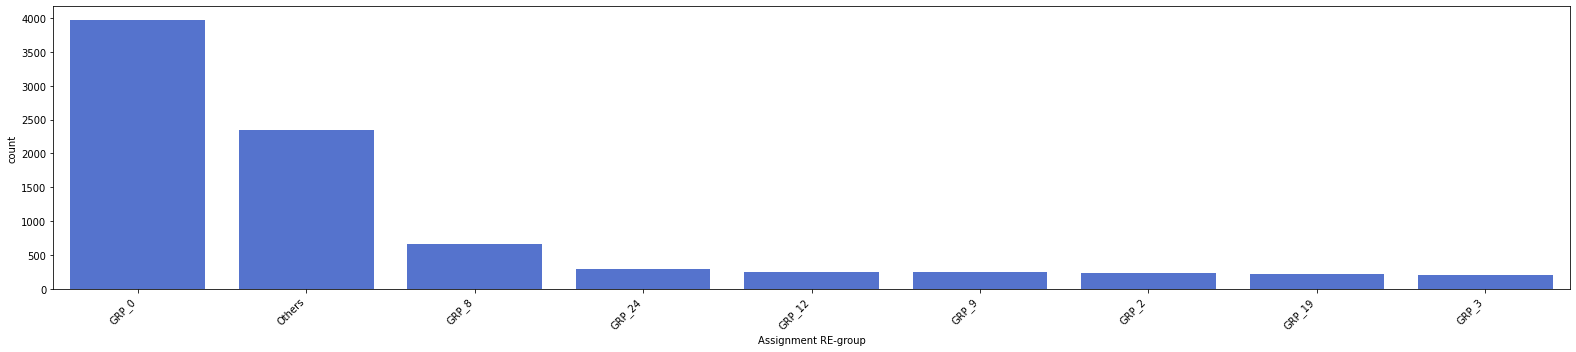

In [ ]:
# Visualising the Distribution after re-classifing the groups in 'Others'.
plt.subplots(figsize=(22,5))
descending_order = df['Assignment RE-group'].value_counts().sort_values(ascending=False).index
ax=sns.countplot(x='Assignment RE-group', data=df, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
df.head(2)

,Assignment group,Assignment RE-group,Cleaned,Length,Language
0,GRP_0,GRP_0,login issue verify user detail employee manage...,36,en
1,GRP_0,GRP_0,outlook hello team meeting skype meeting appea...,24,en


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['Cleaned_tokens'] = df['Cleaned'].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
df.head(2)

,Assignment group,Assignment RE-group,Cleaned,Length,Language,Cleaned_tokens
0,GRP_0,GRP_0,login issue verify user detail employee manage...,36,en,"[login, issue, verify, user, detail, employee,..."
1,GRP_0,GRP_0,outlook hello team meeting skype meeting appea...,24,en,"[outlook, hello, team, meeting, skype, meeting..."


In [ ]:
from gensim.models.phrases import Phrases

In [ ]:
corpus = df['Cleaned_tokens'].tolist()

In [ ]:
phrase_model = Phrases(sentences=corpus,min_count=2,threshold=-0.2,max_vocab_size=20000,scoring='npmi')

In [ ]:
phrase_model[df['Cleaned_tokens'][0]]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['login_issue',
 'verify_user',
 'detail_employee',
 'manager_name',
 'check_user',
 'name_ad',
 'reset_password',
 'advise_user',
 'login_check',
 'caller_confirm',
 'able_login',
 'issue_resolve']

In [ ]:
df['phrases'] = df['Cleaned_tokens'].apply(lambda x: phrase_model[x])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
df.tail(2)

,Assignment group,Assignment RE-group,Cleaned,Length,Language,Cleaned_tokens,phrases
8435,GRP_62,Others,machine unable access machine utility finish d...,20,en,"[machine, unable, access, machine, utility, fi...","[machine, unable_access, machine, utility, fin..."
8436,GRP_49,Others,several various prgramdntym fold plurality pc ...,20,de,"[several, various, prgramdntym, fold, pluralit...","[several, various, prgramdntym_fold, plurality..."


In [ ]:
from gensim.models import Word2Vec

In [ ]:
sentences = df['phrases'].tolist()

In [ ]:
vec_model = Word2Vec(sentences,min_count=1,size=50,sg=1,negative=10,iter=100)

In [ ]:
print(vec_model['outlook'])

[-0.06557938  1.3137809  -0.08147745  0.25948685 -0.6277236   0.3044606
  0.04053769 -0.36101955  0.02466223  0.69405454  1.3979331  -0.16846064
 -0.8171429  -0.02235341 -0.56769943  0.44449264 -0.97246295 -0.07660929
  0.14324284 -0.59499925 -0.30560502  0.44988126 -0.3167281   0.36009607
  0.12176763 -0.30439937  1.1364713   0.810118    0.428784   -0.21388547
  0.80163926  0.52291846 -0.44619545 -0.17165008 -0.11869454 -0.42450887
 -0.44253516  0.14792119  0.6815057   0.17404675  0.67598367  0.0649448
 -0.27485707 -0.60135895  0.25863114  0.47501072  0.16159262 -0.3043874
 -0.14369848  0.21277744]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
words = list(vec_model.wv.vocab)

In [ ]:
words[:10]

['login_issue',
 'verify_user',
 'detail_employee',
 'manager_name',
 'check_user',
 'name_ad',
 'reset_password',
 'advise_user',
 'login_check',
 'caller_confirm']

In [ ]:
print(len(words))

14192


In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
TreebankWordDetokenizer().detokenize(df['phrases'][1])

'outlook hello_team meeting skype_meeting appear outlook_calendar advise correct kind'

In [ ]:
df['Cleaned_phrases'] = df['phrases'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [ ]:
df['Cleaned_phrases'][:3]

0    login_issue verify_user detail_employee manage...
1    outlook hello_team meeting skype_meeting appea...
2                                 log_vpn log_vpn good
Name: Cleaned_phrases, dtype: object

In [ ]:
df['phrases_length'] =  df['Cleaned_phrases'].apply(lambda x: len(x.split()))

In [ ]:
df.tail()

,Assignment group,Assignment RE-group,Cleaned,Length,Language,Cleaned_tokens,phrases,Cleaned_phrases,phrases_length
8432,GRP_29,Others,email come mail good afternoon receiving email...,21,en,"[email, come, mail, good, afternoon, receiving...","[email_come, mail, good_afternoon, receiving, ...",email_come mail good_afternoon receiving email...,8
8433,GRP_0,GRP_0,telephony software issue,3,en,"[telephony, software, issue]","[telephony_software, issue]",telephony_software issue,2
8434,GRP_0,GRP_0,vip window password reset pedxruyf,7,en,"[vip, window, password, reset, pedxruyf]","[vip, window_password, reset, pedxruyf]",vip window_password reset pedxruyf,4
8435,GRP_62,Others,machine unable access machine utility finish d...,20,en,"[machine, unable, access, machine, utility, fi...","[machine, unable_access, machine, utility, fin...",machine unable_access machine utility finish d...,9
8436,GRP_49,Others,several various prgramdntym fold plurality pc ...,20,de,"[several, various, prgramdntym, fold, pluralit...","[several, various, prgramdntym_fold, plurality...",several various prgramdntym_fold plurality pc ...,9


In [ ]:
df1 = df.copy()

In [ ]:
# df1 = df.drop_duplicates(subset = 'Cleaned',keep = 'first')
# df1.shape

In [ ]:
df.columns

Index(['Assignment group', 'Assignment RE-group', 'Cleaned', 'Length',
       'Language', 'Cleaned_tokens', 'phrases', 'Cleaned_phrases',
       'phrases_length'],
      dtype='object')

In [ ]:
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_49', 'GRP_50', 'GRP_51',
       'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_48', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [ ]:
df['Assignment RE-group'].unique()

array(['GRP_0', 'Others', 'GRP_3', 'GRP_8', 'GRP_9', 'GRP_12', 'GRP_19',
       'GRP_2', 'GRP_24'], dtype=object)

In [ ]:
df.shape

(8437, 9)

In [ ]:
df1[df1['Language'] != 'en'].shape

(657, 9)

In [ ]:
df1 = df1[df1['Language'] == 'en']
df1.shape

(7780, 9)

In [ ]:
df1 = df1[df1['Assignment RE-group'] != 'Others']
df1.shape

(5015, 9)

In [ ]:
labels_ = df1['Assignment RE-group'].unique()
print(labels_)
print(df1['Assignment RE-group'].nunique())

['GRP_0' 'GRP_8' 'GRP_9' 'GRP_12' 'GRP_24']
5


In [ ]:
df1['phrases_length'].describe()

count    5015.000000
mean        9.774078
std        13.869434
min         1.000000
25%         2.000000
50%         5.000000
75%        12.000000
max       346.000000
Name: phrases_length, dtype: float64

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 10000,split = ' ',filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(df1['Cleaned_phrases'].values)

In [ ]:
X = tokenizer.texts_to_sequences(df1['Cleaned_phrases'].values)
y = df1['Assignment RE-group']

In [ ]:
max_len = 20
X = pad_sequences(X,maxlen= max_len)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes = 5)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1,stratify = y)

In [ ]:
print(x_train.shape,y_test.shape)

(4012, 20) (1003, 5)


In [ ]:
tokenizer.word_index

{'job_scheduler': 1,
 'fail_job': 2,
 'scheduler_job': 3,
 'job_job': 4,
 'job_fail': 5,
 'password_reset': 6,
 'erp_sid': 7,
 'outlook': 8,
 'issue': 9,
 'password': 10,
 'backup_circuit': 11,
 'user': 12,
 'account_lock': 13,
 'work': 14,
 'access': 15,
 'email': 16,
 'telecom_vendor': 17,
 'erp': 18,
 'reset_password': 19,
 'engineering_tool': 20,
 'company': 21,
 'ticket_update': 22,
 'unable_login': 23,
 'lock': 24,
 'type_outage': 25,
 'help': 26,
 'schedule_maintenance': 27,
 'need': 28,
 'update': 29,
 'skype': 30,
 'vpn': 31,
 'collaboration_platform': 32,
 'get': 33,
 'ticket': 34,
 'hostname': 35,
 'error': 36,
 'system': 37,
 'name': 38,
 'use': 39,
 'problem': 40,
 'reset': 41,
 'request': 42,
 'server': 43,
 'call': 44,
 'time': 45,
 'report': 46,
 'computer': 47,
 'try': 48,
 'manager': 49,
 'login_issue': 50,
 'account': 51,
 'open': 52,
 'team': 53,
 'check': 54,
 'file': 55,
 'good': 56,
 'go': 57,
 'inplant': 58,
 'printer': 59,
 'able_login': 60,
 'unable_connect': 

In [ ]:
vocab_len = len(tokenizer.word_index)+1
print(vocab_len)
embedding_size = 80

7495


In [ ]:
embedding_dict = {}
for word in words:
  x = word
  vector = np.asarray(vec_model[x],dtype='float32')
  embedding_dict[x] = vector

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_len,embedding_size))

for word,i in tokenizer.word_index.items():
  embedding_vector = embedding_dict.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [ ]:
embedding_matrix.shape

(7495, 80)

In [ ]:
print(x_train.shape,y_train.shape)

(4012, 20) (4012, 5)


In [ ]:
y_train_labels = np.argmax(y_train,axis=1)

In [ ]:
np.unique(y_train_labels)

array([0, 1, 2, 3, 4])

In [ ]:
from sklearn.utils import class_weight
cw = class_weight.compute_class_weight('balanced',classes = np.unique(y_train_labels),y = y_train_labels)

In [ ]:
cw

array([ 0.26068876,  4.38469945, 11.30140845,  1.59522863,  4.53333333])

In [ ]:
weights = {}
for i in range(5):
  weights[i] = cw[i]

In [ ]:
weights[4] = 3.0

In [ ]:
weights

{0: 0.260688758934373,
 1: 4.384699453551913,
 2: 11.301408450704225,
 3: 1.5952286282306163,
 4: 3.0}

In [ ]:
from tensorflow.keras.layers import LSTM,Embedding,Dense,Dropout,Flatten,Bidirectional,GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = vocab_len,output_dim = embedding_size,input_length = max_len, weights = [embedding_matrix], trainable = False))
model.add(Bidirectional(LSTM(50)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 80)            599600    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 100)               52400     
_________________________________________________________________
flatten_6 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               12928     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 5)                

In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
sgd = optimizers.SGD(learning_rate=0.001,momentum=0.9)
adam = optimizers.Adam()

model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics= ['accuracy'])

In [ ]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss',patience=3)
# reduc = ReduceLROnPlateau(monitor='val_loss',patience=4,factor=0.5)

In [ ]:
model.fit(x_train,y_train,epochs=30,batch_size=16,validation_data=(x_test,y_test),class_weight=weights)

Epoch 1/30
251/251 [==============================] - 10s 21ms/step - loss: 0.9466 - accuracy: 0.6032 - val_loss: 0.3154 - val_accuracy: 0.8714
Epoch 2/30
251/251 [==============================] - 4s 17ms/step - loss: 0.3802 - accuracy: 0.8650 - val_loss: 0.4215 - val_accuracy: 0.8604
Epoch 3/30
251/251 [==============================] - 4s 17ms/step - loss: 0.3246 - accuracy: 0.8937 - val_loss: 0.3436 - val_accuracy: 0.8564
Epoch 4/30
251/251 [==============================] - 4s 17ms/step - loss: 0.2923 - accuracy: 0.8953 - val_loss: 0.4780 - val_accuracy: 0.8415
Epoch 5/30
251/251 [==============================] - 4s 17ms/step - loss: 0.2183 - accuracy: 0.9081 - val_loss: 0.3005 - val_accuracy: 0.8814
Epoch 6/30
251/251 [==============================] - 4s 17ms/step - loss: 0.2102 - accuracy: 0.9272 - val_loss: 0.4849 - val_accuracy: 0.8544
Epoch 7/30
251/251 [==============================] - 4s 17ms/step - loss: 0.2072 - accuracy: 0.9260 - val_loss: 0.2866 - val_accuracy: 0.895

In [ ]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 6ms/step - loss: 0.4790 - accuracy: 0.9003


[0.47896265983581543, 0.9002991318702698]

In [ ]:
 from sklearn.metrics import confusion_matrix

In [ ]:
predicted_labels = model.predict(x_test)

In [ ]:
y_pred = np.where(predicted_labels>0.5,1,0)

In [ ]:
y_test[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
y_pred[0]

array([0, 0, 0, 1, 0])

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))

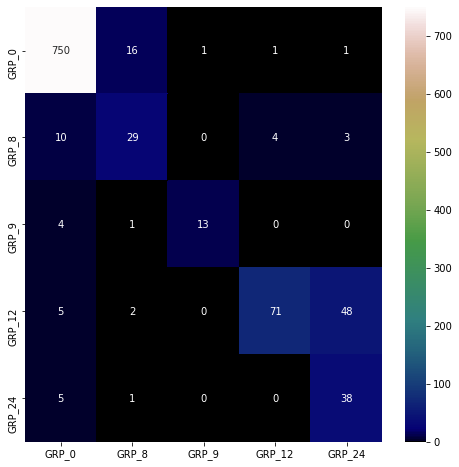

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,xticklabels=labels_,yticklabels=labels_,fmt='.4g',cmap='gist_earth')

In [ ]:
df1['Assignment RE-group'].value_counts()

GRP_0     3847
GRP_8      629
GRP_12     229
GRP_9      221
GRP_24      89
Name: Assignment RE-group, dtype: int64

In [ ]:
count = 0
for i in range(y_test.shape[0]):
  if y_train[i][0] == 1.0:
    count +=1
print(count)

763


# 